In [5]:
from pylab import *

%matplotlib inline

In [4]:
D = 100
N = 10000

image_vectors = 2 * (np.random.randn(D, N) < 0) - 1




In [5]:
M = 50
im_id = np.zeros(M)
hypervector = np.zeros(N)

for m in range(M):
    
    im_id[m] = np.random.randint(D)
    hypervector = np.roll(hypervector, 1) + image_vectors[im_id[m], :]
    


/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


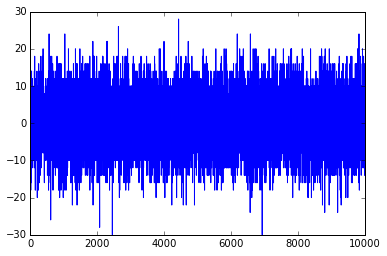

In [9]:
plot(hypervector)

In [ ]:

decode_vectors = np.zeros((M, N))

for m in range(M):
    

In [11]:
imnet_im = imread('data/image_net/n00007846_100421.JPEG')

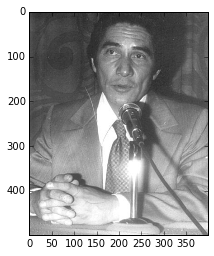

In [12]:
imshow(imnet_im)

In [13]:
imnet_im.shape


(498, 398, 3)

In [2]:
import glob

im_list = glob.glob('data/image_net/*')
print len(im_list)

12226


In [6]:
imread

<function matplotlib.pyplot.imread>

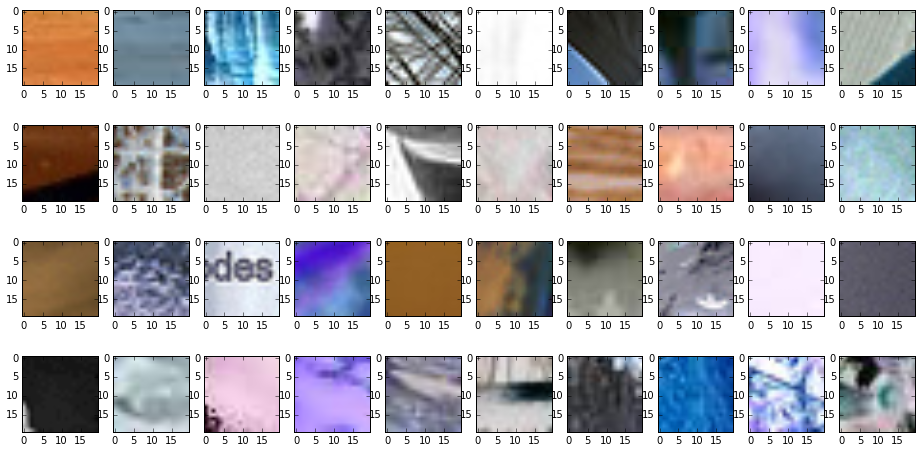

In [380]:
import imnet_utils as imut
reload(imut)

impatches = imut.load_random_imnet_patches(2000)

figure(figsize=(16,10))
nshow = 40
maxrow=10
for i in range(nshow):
    subplot(nshow//maxrow + 1, maxrow,i+1)
    imshow(impatches[:,:,:,i])

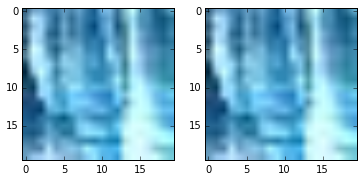

In [381]:
impatchr = impatches.reshape((-1, impatches.shape[3]))

irec = impatchr[:, 2].reshape((impatches.shape[0], impatches.shape[1], impatches.shape[2]))

subplot(121)
imshow(impatches[:,:,:,2])
subplot(122)
imshow(irec)

In [382]:
impatchr.shape

(1200, 2000)

In [384]:
import sklearn
from sklearn.decomposition import SparsePCA, PCA, FastICA

ncomponents = 

sppca_encoder = SparsePCA(ncomponents)
pca_encoder = PCA(ncomponents)
fica_encoder = FastICA(ncomponents)



In [ ]:
import time
tstart = time.time()
sppca_encoder.fit(impatchr.T)
print 'Duration: ', time.time() - tstart


In [385]:
import time
tstart = time.time()
pca_encoder.fit(impatchr.T)
print 'Duration: ', time.time() - tstart


Duration:  2.28703904152


In [386]:
scores = pca_encoder.transform(impatchr.T)

In [387]:
scores.shape

(2000, 120)

In [388]:
comp = pca_encoder.components_

print comp.shape
#comp_ims = scores.reshape((impatches.shape[0], impatches.shape[1], impatches.shape[2], -1))
comp_ims = comp.T.reshape((impatches.shape[0], impatches.shape[1], impatches.shape[2], -1))

(120, 1200)


In [389]:
comp_ims.min()

-0.13706950949899763

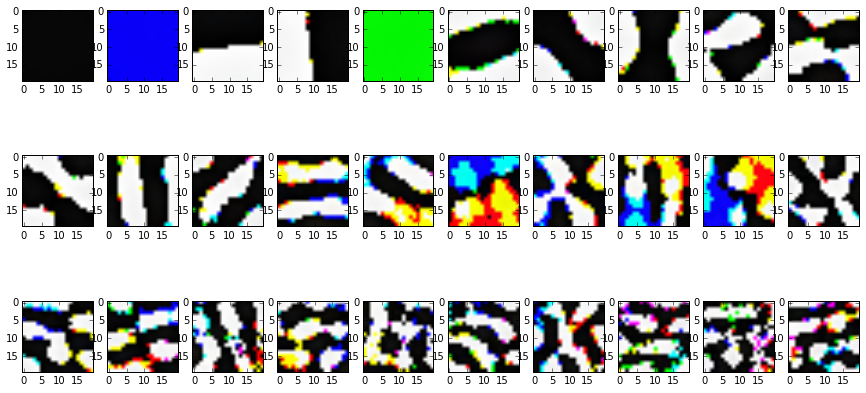

In [390]:
from __future__ import division
figure(figsize=(15,10))
nshow = 30
maxrow=10
for i in range(nshow):
    subplot(nshow//maxrow+1,maxrow,i+1)
    imshow(comp_ims[:,:,:,i])

In [391]:
fica_encoder.fit(scores)


FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=120, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

In [394]:
#ic_comp = fica_encoder.transform(comp)
ic_comp = fica_encoder.components_
ic_comp /= ic_comp.std(axis=0)
ic_comp = np.dot(ic_comp, comp)
print ic_comp.shape

(120, 1200)


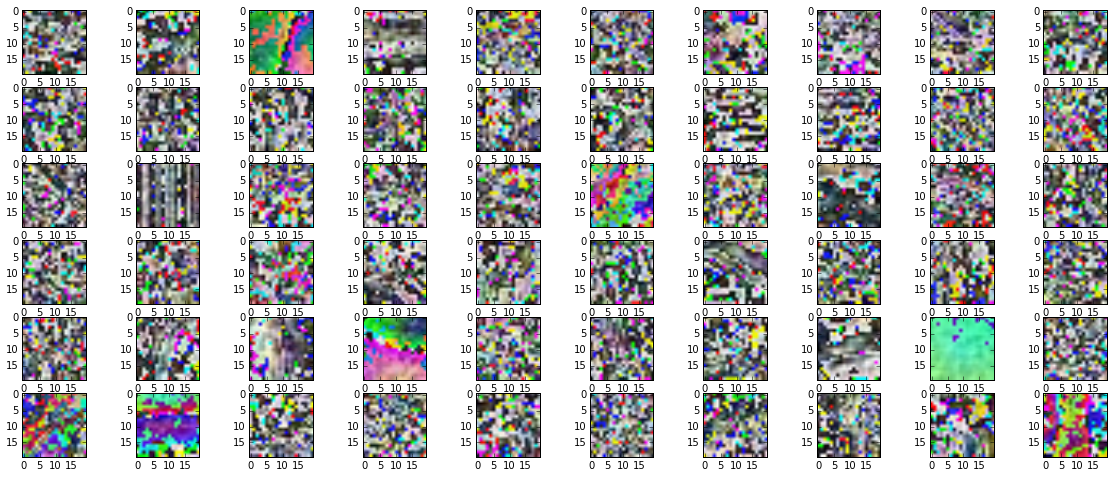

In [395]:
ic_comp_ims = ic_comp.T.reshape((impatches.shape[0], impatches.shape[1], impatches.shape[2], -1))
figure(figsize=(20,8))
nshow = 60
maxrow=10
for i in range(nshow):
    subplot(nshow//maxrow,maxrow,i+1)
    imshow(ic_comp_ims[:,:,:,i])

In [235]:
from sklearn.decomposition import sparse_encode

In [396]:
#impatch = imut.load_random_imnet_patches(1)
impatch = impatches[:,:,:,58]
impatchr = impatch.reshape((-1, 1))

In [397]:
impatchr.shape

(1200, 1)

In [398]:
ic_comp.shape

(120, 1200)

In [455]:
code = sparse_encode(impatchr.T-impatchr.mean(), ic_comp)

In [458]:
c = linalg.lstsq(ic_comp.T, impatchr-np.mean(impatchr))
code = c[0].T

In [459]:
code.shape

(1, 120)

In [460]:
def norm_range(v):
    return (v-v.min())/(v.max()-v.min())

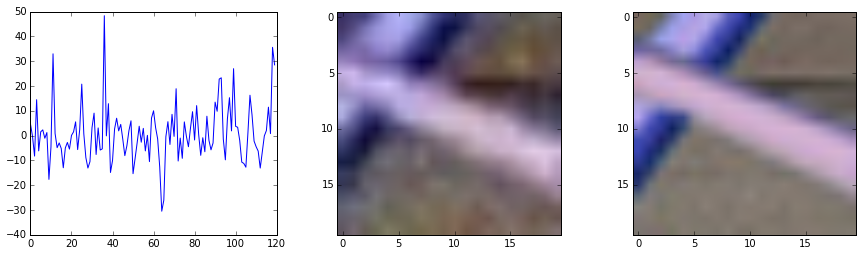

In [461]:
figure(figsize=(15, 4))
subplot(131)
plot(code.T)
subplot(132)
recon = np.dot(code, ic_comp)
reconr = recon.reshape(impatch.shape[0], impatch.shape[1], impatch.shape[2])
imshow(norm_range(-reconr))
imp = impatchr.reshape((impatch.shape[0], impatch.shape[1], impatch.shape[2]))
subplot(133)
imshow(imp-impatchr.mean())

In [443]:
reconr.min()

-116.19650399532277

In [415]:
rec

array([[ 48.38788503,  55.78445691,  12.21476266, ..., -10.03774159,
          2.9452197 ,   3.53296083]])

In [277]:
code.argmax()

9